In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import random
from scipy import ndimage
from tensorflow import keras

In [47]:
ESC = 27
KEY_a = 97
KEY_d = 100
path = 'C:/Users/Sizov/ML_sizova/nails/'
def callback(x):
    pass
model = keras.models.load_model('unet_model3.h5')

In [85]:
cap = cv2.VideoCapture(0)
window_name = "Show your nails"
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Nails.avi', fourcc, 20.0, (256, 512))
currentFrame = 0
cv2.createTrackbar('Threshold', 'Image', 64, 255, callback)
while True:  
    ret, frame = cap.read()
    if not ret:
        break
    #predicted = model.predict(frame)
    cv2.resizeWindow(window_name, 256, 256) 
    cv2.imshow(window_name, frame)
    name = path +str(currentFrame) + '.jpg'
    cv2.imwrite(name, frame)
    out.write(frame)
    currentFrame += 1
    key = cv2.waitKey(20)
    
    if key == ESC:
        break

cap.release()
cv2.destroyWindow(window_name)

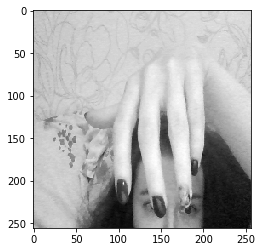

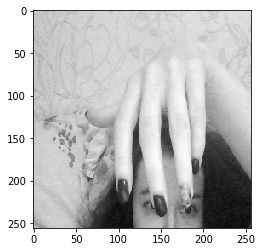

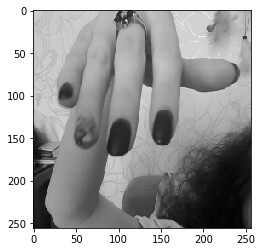

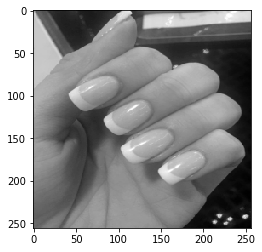

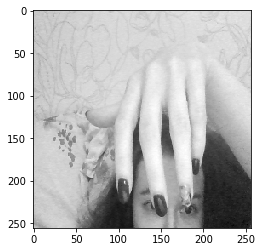

In [94]:
images = os.listdir(path)
folder_size = len(images)
nail_data = []

for i in images:
    im = cv2.cvtColor(cv2.imread(os.path.join(path,i)),cv2.COLOR_BGR2GRAY)

    nail_data.append(cv2.resize(im,(256,256)))
for i in range(5):
    plt.figure()
    plt.imshow(nail_data[i],cmap='gray')
    plt.show()
    

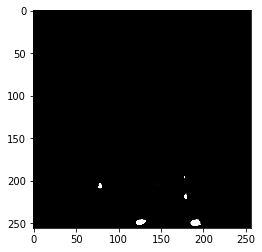

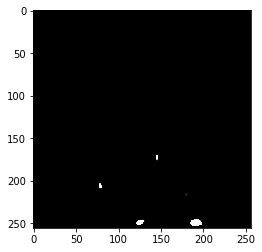

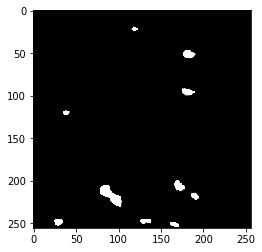

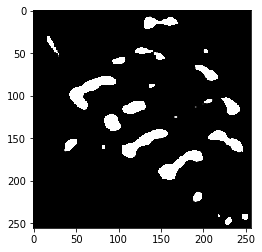

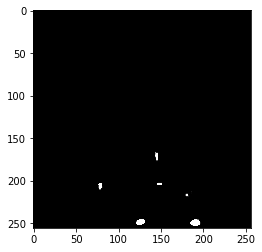

In [101]:

for i in range(5):
    mask = (np.reshape(model.predict(nail_data[i].reshape(1,256,256)),
                                                         (256, 256)))
    #nothing, mask = cv2.threshold(predictScaled, 64, 255, cv2.THRESH_BINARY)
    dilationKernel = np.ones((2,2), np.uint8)
    mask = cv2.dilate(mask, dilationKernel, iterations = 1)
    plt.figure()
    plt.imshow(mask,cmap = 'gray')

130
